In [ ]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

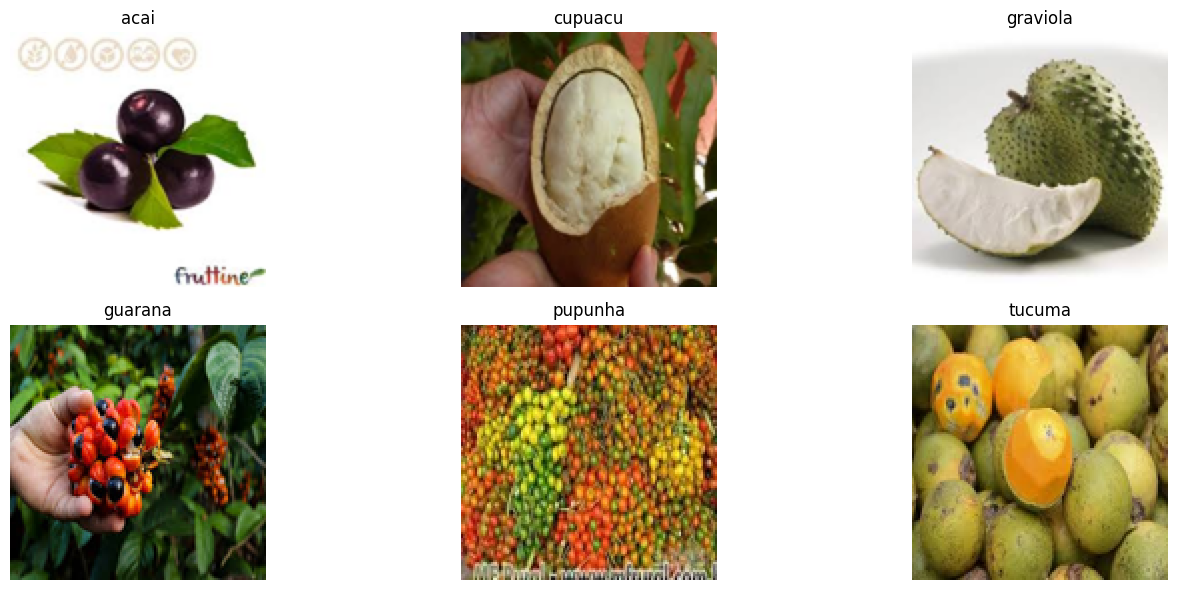

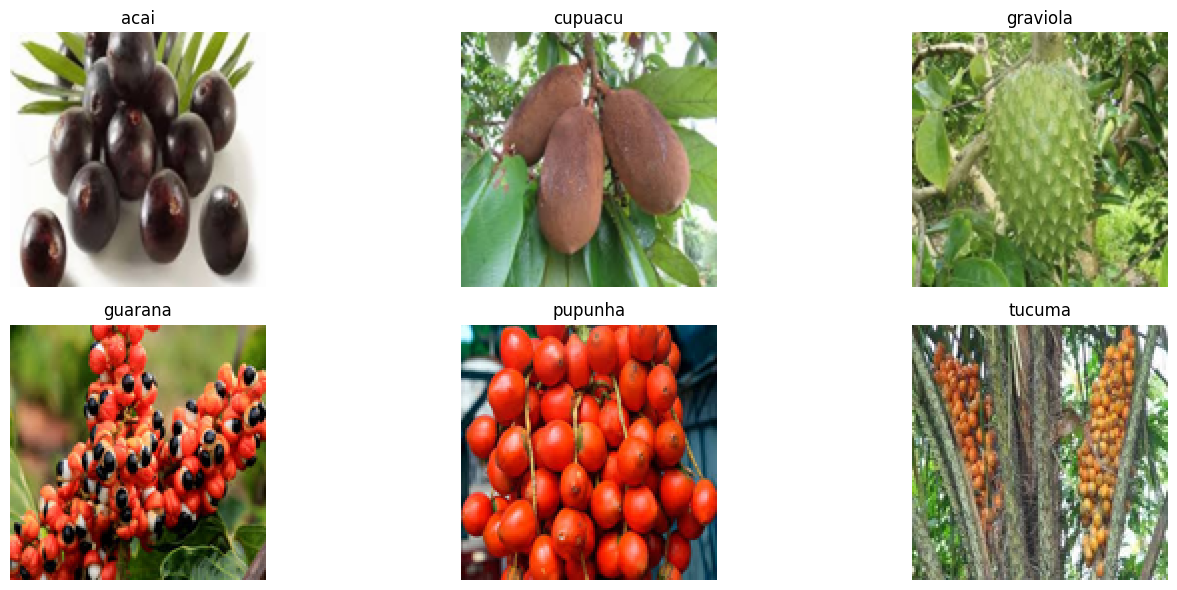

Observation: Images are in RGB format and represent different fruit categories.
No corrupted images found in /content/drive/MyDrive/Ai/FruitinAmazon/FruitinAmazon/train.


In [ ]:
test_dir = "/content/drive/MyDrive/Ai/FruitinAmazon/FruitinAmazon/test"

# Define image size
img_height, img_width = 128, 128

# Task 1.1: Load and visualize one random image from each class in Train
class_names = sorted(os.listdir(train_dir))
fig, axes = plt.subplots(2, len(class_names) // 2, figsize=(15, 6))
axes = axes.flatten()

for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path).resize((img_width, img_height))  # No grayscale conversion
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Task 1.1b: Visualize from Test directory
class_names_test = sorted(os.listdir(test_dir))
fig, axes = plt.subplots(2, len(class_names_test) // 2, figsize=(15, 6))
axes = axes.flatten()

for i, class_name in enumerate(class_names_test):
    class_path = os.path.join(test_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path).resize((img_width, img_height))  # No grayscale conversion
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Observation Placeholder
print("Observation: Images are in RGB format and represent different fruit categories.")

# Task 1.2: Check and remove corrupted images from Train

def check_and_remove_corrupted_images(directory):
    corrupted_images = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                img.verify()
            except (IOError, SyntaxError) as e:
                corrupted_images.append(img_path)
                os.remove(img_path)
                print(f"Removed corrupted image: {img_path}")
    if not corrupted_images:
        print(f"No corrupted images found in {directory}.")

check_and_remove_corrupted_images(train_dir)

In [ ]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization (Rescaling)
rescale = tf.keras.layers.Rescaling(1./255)

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # Keep labels as integers for now
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), tf.keras.utils.to_categorical(y, num_classes=num_classes)))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # Keep labels as integers for now
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), tf.keras.utils.to_categorical(y, num_classes=num_classes)))




Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define number of output classes (example: 10 for multi-class classification)
num_classes = 10



# Build the CNN model
model = models.Sequential([

    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, input_shape=(img_height, img_width, 3)),
    layers.ReLU(),  # Using ReLU activation directly after Conv2D layer
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer (flatten the input to a 1D vector)
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer (softmax activation for multi-class classification)
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model (use 'adam' optimizer, 'categorical_crossentropy' for multi-class classification)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set batch size and number of epochs
batch_size = 16
epochs = 250

# ModelCheckpoint callback: Save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# EarlyStopping callback: Stop training if the validation loss doesn't improve for a specified number of epochs
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

history = model.fit(
    train_ds,  # The training dataset
    validation_data=val_ds,  # The validation dataset
    epochs=50,  # You can adjust the number of epochs as needed
    batch_size=batch_size,  # Batch size used during training (already set)
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.1453 - loss: 2.7589
Epoch 1: val_loss improved from inf to 1.84934, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 817ms/step - accuracy: 0.1437 - loss: 2.8053 - val_accuracy: 0.0000e+00 - val_loss: 1.8493
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.2078 - loss: 1.9559
Epoch 2: val_loss did not improve from 1.84934
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 721ms/step - accuracy: 0.2218 - loss: 1.9402 - val_accuracy: 0.0000e+00 - val_loss: 1.9242
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.3194 - loss: 1.7740
Epoch 3: val_loss improved from 1.84934 to 1.76873, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.3229 - loss: 1.7662 - val_accuracy: 0.0000e+00 - val_loss: 1.7687
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.2888 - loss: 1.6378
Epoch 4: val_loss improved from 1.76873 to 1.48594, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.2964 - loss: 1.6253 - val_accuracy: 0.7778 - val_loss: 1.4859
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5046 - loss: 1.4903
Epoch 5: val_loss improved from 1.48594 to 1.21758, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.5069 - loss: 1.4763 - val_accuracy: 0.7778 - val_loss: 1.2176
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.5492 - loss: 1.3046
Epoch 6: val_loss improved from 1.21758 to 1.16392, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 449ms/step - accuracy: 0.5543 - loss: 1.2887 - val_accuracy: 0.7222 - val_loss: 1.1639
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6487 - loss: 1.0810
Epoch 7: val_loss did not improve from 1.16392
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.6567 - loss: 1.0638 - val_accuracy: 0.6111 - val_loss: 1.1672
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.7286 - loss: 0.9220
Epoch 8: val_loss improved from 1.16392 to 0.98638, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.7374 - loss: 0.9047 - val_accuracy: 0.6667 - val_loss: 0.9864
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.7789 - loss: 0.7175
Epoch 9: val_loss improved from 0.98638 to 0.86722, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.7856 - loss: 0.7026 - val_accuracy: 0.7222 - val_loss: 0.8672
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8495 - loss: 0.5796
Epoch 10: val_loss improved from 0.86722 to 0.80552, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.8524 - loss: 0.5684 - val_accuracy: 0.8333 - val_loss: 0.8055
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8999 - loss: 0.4362
Epoch 11: val_loss did not improve from 0.80552
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.9006 - loss: 0.4266 - val_accuracy: 0.7222 - val_loss: 0.8237
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8999 - loss: 0.3768
Epoch 12: val_loss did not improve from 0.80552
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.9006 - loss: 0.3704 - val_accuracy: 0.7778 - val_loss: 1.1341
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7685 - loss: 0.6528
Epoch 13: val_loss improved from 0.80552 to 0.37358, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.7778 - loss: 0.6235 - val_accuracy: 0.8889 - val_loss: 0.3736
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7784 - loss: 0.8200
Epoch 14: val_loss did not improve from 0.37358
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.7886 - loss: 0.7772 - val_accuracy: 0.3333 - val_loss: 1.3762
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.8692 - loss: 0.4133
Epoch 15: val_loss did not improve from 0.37358
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step - accuracy: 0.8741 - loss: 0.3985 - val_accuracy: 0.8333 - val_loss: 0.8192
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.9803 - loss: 0.2065
Epoch 16: val_loss did not improve from 0.37358
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 703ms/step - accuracy: 0.9783 - loss: 0.2036 - val_accuracy: 0.8333 - val_loss: 0.6560
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9595 - loss: 0.1973
Epoch 17: val_loss improved from 0.37358 to 0.32139, sav

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.9627 - loss: 0.1885 - val_accuracy: 0.8889 - val_loss: 0.3214
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0982
Epoch 18: val_loss did not improve from 0.32139
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 1.0000 - loss: 0.0968 - val_accuracy: 0.8333 - val_loss: 0.3900
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9797 - loss: 0.1034
Epoch 19: val_loss did not improve from 0.32139
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step - accuracy: 0.9813 - loss: 0.1007 - val_accuracy: 0.9444 - val_loss: 0.3660
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 1.0000 - loss: 0.0483
Epoch 20: val_loss did not improve from 0.32139
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 1.0000 - loss: 0.0473 - val_accuracy: 0.8333 - val_loss: 0.4689
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 1.0000 - loss: 0.0436
Epoch 21: val_loss did not improve from 0.32139
3/3 ━━━━

In [ ]:
# Create test dataset with normalization
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # The directory for the test data
    labels='inferred',
    label_mode='int',  # Keep labels as integers for now
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # No need to shuffle the test data
)

# Apply normalization and convert labels to one-hot encoded
test_ds = test_ds.map(lambda x, y: (rescale(x), tf.keras.utils.to_categorical(y, num_classes=num_classes)))



# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 30 files belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7375 - loss: 0.7236
Test Loss: 0.7922253012657166
Test Accuracy: 0.699999988079071


In [ ]:
# Save the model
model.save('fruit_classification_model.h5')
print("Model saved as 'fruit_classification_model.h5'")


Model saved as 'fruit_classification_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('fruit_classification_model.h5')
print("Model loaded successfully")


Model loaded successfully


In [ ]:
# Make predictions on the test dataset
predictions = model.predict(test_ds, verbose=1)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [ ]:
from sklearn.metrics import classification_report

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert true labels from one-hot encoding to integer labels
true_labels = np.argmax(true_labels, axis=1)

# Map integer labels to class names
class_names = sorted(os.listdir(train_dir))  # Get class names from the training directory
predicted_labels = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels

# Convert integer labels to class names
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Print the classification report with class names
print(classification_report(true_class_names, predicted_class_names))


              precision    recall  f1-score   support

        acai       0.62      1.00      0.77         5
     cupuacu       0.67      0.40      0.50         5
    graviola       0.62      1.00      0.77         5
     guarana       1.00      0.60      0.75         5
     pupunha       1.00      0.80      0.89         5
      tucuma       0.50      0.40      0.44         5

    accuracy                           0.70        30
   macro avg       0.74      0.70      0.69        30
weighted avg       0.74      0.70      0.69        30

